#### KWAKYE GEORGE

## Decline Curve Analysis on Volve field

This project aims to apply decline curve analysis on the volve field data.
The aim is to build a model that will:
1. Generate a DCA well type curve for well1 5/9-F-12
2. Determine the drive mechanism of the field


### Volve field discription
 The Volve field is located in the norwegain sea. It is located 200 kilometers of stavanger. The original oil in place was 18.70mill sm3. The well 15/9-F-12 is used in this project.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import curve_fit
from scipy.stats.mstats import winsorize

Import the volve dataset

In [2]:

Volve_data = pd.read_excel('Volve production data.xlsx',sheet_name='Daily Production Data')
pd.set_option('display.max_columns',None)

Volve_data.head(2)

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,0.0,0.0,0.000000,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP


In [3]:
Volve_data.dtypes

DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                           object
WELL_TYPE  

Let's change the columns names 

In [4]:

list(Volve_data.columns)

['DATEPRD',
 'WELL_BORE_CODE',
 'NPD_WELL_BORE_CODE',
 'NPD_WELL_BORE_NAME',
 'NPD_FIELD_CODE',
 'NPD_FIELD_NAME',
 'NPD_FACILITY_CODE',
 'NPD_FACILITY_NAME',
 'ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_CHOKE_UOM',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL',
 'FLOW_KIND',
 'WELL_TYPE']

In [5]:
columns_names = {'DATEPRD':'Dates',
 'WELL_BORE_CODE':'well_id',
 'NPD_WELL_BORE_CODE':'well_name_code',
 'NPD_WELL_BORE_NAME':'well_name',
 'NPD_FIELD_CODE': 'field_code',
 'NPD_FIELD_NAME':'field_name',
 'NPD_FACILITY_CODE':'facility_code',
 'NPD_FACILITY_NAME':'facility_name',
 'ON_STREAM_HRS':'on_stream_hrs',
 'AVG_DOWNHOLE_PRESSURE':'bhp',
 'AVG_DOWNHOLE_TEMPERATURE':'bht',
 'AVG_DP_TUBING':'dp_tubing',
 'AVG_ANNULUS_PRESS':'casing_pressure',
 'AVG_CHOKE_SIZE_P':'choke_size',
 'AVG_CHOKE_UOM':'choke_units',
 'AVG_WHP_P':'tht',
 'AVG_WHT_P':'thp',
 'DP_CHOKE_SIZE':'choke size percentage',
 'BORE_OIL_VOL':'oil_vol',
 'BORE_GAS_VOL':'gas_vol',
 'BORE_WAT_VOL':'water_vol',
 'BORE_WI_VOL':'water_inj',
 'FLOW_KIND':'flow_kind',
 'WELL_TYPE':'well_type'
    
}

In [6]:
Volve_data =Volve_data.rename(columns=columns_names)
Volve_data.head(2)

#Volve_data.shape

,Dates,well_id,well_name_code,well_name,field_code,field_name,facility_code,facility_name,on_stream_hrs,bhp,bht,dp_tubing,casing_pressure,choke_size,choke_units,tht,thp,choke size percentage,oil_vol,gas_vol,water_vol,water_inj,flow_kind,well_type
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,0.0,0.0,0.000000,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP


Let's check the different types of wells in the data

In [7]:

Volve_data['well_type'].unique()

array(['WI', 'OP'], dtype=object)

We are only focusing on production data

In [8]:

Volve_data = Volve_data[Volve_data['well_type'] == 'OP']
#Volve_data.shape

Volve_data['well_type'].unique()

array(['OP'], dtype=object)

Let's create a new dataset that contains well names,dates and oil_vol

In [9]:
Prod_data = Volve_data[['Dates','well_name','oil_vol']]
Prod_data.to_excel('prod_data.xlsx',index = False)

In [10]:
data = pd.read_excel('Prod_data.xlsx')
data.dtypes

Dates        datetime64[ns]
well_name            object
oil_vol             float64
dtype: object

In [11]:
wellnames =data['well_name'].unique()

Let's write a function that plot the wells in the dataset

In [12]:
#function to plot the wells
def wellplot(df,list_wells):
    fig, ax = plt.subplots(figsize=(15,8))
    plt.xlabel('Date')
    plt.ylabel('Rate')
    for well in list_wells:
        df_filtered = df[df['well_name']==well]
        rate = df_filtered['oil_vol']
        date = df_filtered['Dates']
        ax.plot(date,rate,'o',label = well)
    ax.legend(shadow = True,fancybox = True)

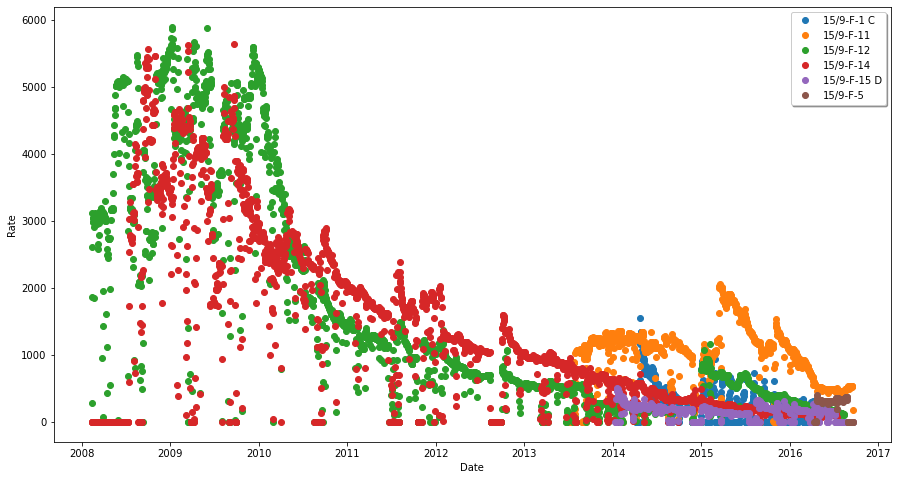

In [13]:
plot_data = wellplot(data,wellnames)

We are only interested in performing DCA on the well 15/9-F-12

In [14]:
selected_wells =['15/9-F-12']
new_data = data[data['well_name']=='15/9-F-12']
new_data.to_excel('volve_well.xlsx')

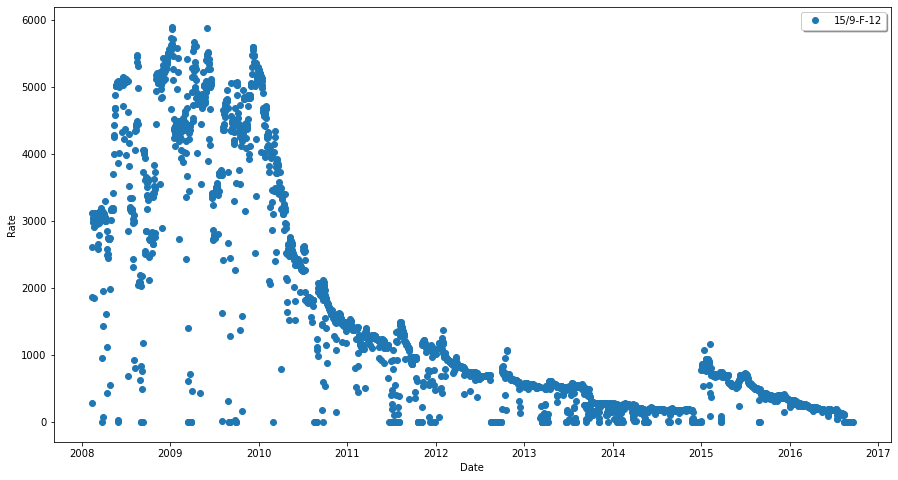

In [15]:
wellplot(new_data,selected_wells)

From the graph, the oil rate started declining somewhere in late 2009. We will filter the data in order to capture the decline

In [16]:
new_data = new_data[new_data['Dates'] >='2009-10-01']


new_data.to_excel('d.xlsx',index=False)
dca_data = pd.read_excel('d.xlsx',index_col=0,parse_dates=True)

In [17]:
dca_data.head(5)

,well_name,oil_vol
Dates,,
2009-10-01,15/9-F-12,3565.94
2009-10-02,15/9-F-12,4883.02
2009-10-03,15/9-F-12,5037.57
2009-10-04,15/9-F-12,5032.99
2009-10-05,15/9-F-12,5072.51


We will be plotting time vs flow rate. The data contains time in terms of dates. Let's convert the dates into days

In [18]:
#convert dates to days
def day_converter(data):
    days = []
    for day in range(len(data)):
        delta = data.index[day] - data.index[0]
        days.append(delta.days)
    days = np.array(days)
    return days

dca_data['days'] = day_converter(dca_data)

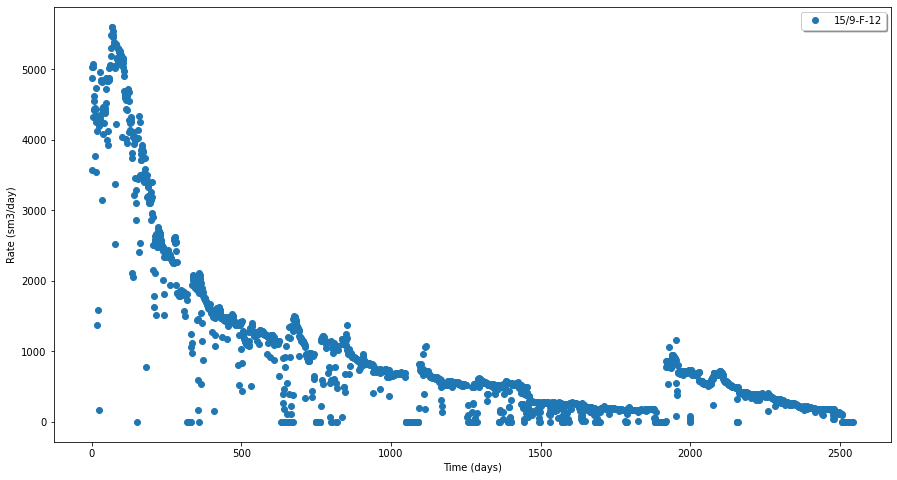

In [19]:
#plots the data with the days column
def wellplot2(df,list_wells):
    fig, ax = plt.subplots(figsize=(15,8))
    plt.xlabel('Time (days)')
    plt.ylabel('Rate (sm3/day)')
    for well in list_wells:
        df_filtered = df[df['well_name']==well]
        rate = df_filtered['oil_vol']
        time = df_filtered['days']
        ax.plot(time,rate,'o',label = well)
    ax.legend(shadow = True,fancybox = True)


wellplot2(dca_data,selected_wells)

## Generate a DCA well type curve for well 15/9-F-12

let's now develop a function that fits the arps model to the data

In [20]:

def arps(t, b_factor, initial_rate, decline):
    if b_factor == 0:
        values = initial_rate * np.exp(-decline * t)
    else:
        values = initial_rate / ((1 + b_factor * decline * t) ** (1 / b_factor))
    return values

def WellFit(newdict, wells, n_days):
    fitdict = {}
    prod_total = np.zeros([n_days])
    i = 0
    time_size = 0
    final_time = []
    for well in wells:
        time = newdict['days']
        if len(time) > time_size:
            time_size = len(time)
            final_time = time       
        prod_temp = newdict['oil_vol']
        prod = np.zeros([n_days])
        prod[:len(prod_temp)] = prod_temp
        prod_total = prod_total + prod
        i = i + 1
    print(len(final_time))
    prod_total = prod_total/i
    popt, pcov = curve_fit(arps, final_time, prod_total, bounds=([0, 0, 0],[1, 10000, 0.1]))
    fitdict = {
        'initial rate': popt[1],
        'beta': popt[0],
        'decline rate': popt[2]
    }
    return fitdict    

In [21]:
#Create a new dataset that contains only days and oil_vol columns
norm = dca_data[['days','oil_vol']]

#returns the length of the days columns
n_days = len(norm['days'])
n_days

2464

In [22]:
well_fit =  WellFit(norm, selected_wells, n_days)
well_fit

2464


{'initial rate': 5491.403300673995,
 'beta': 0.50136786829605,
 'decline rate': 0.003940549305964311}

In [23]:
qi= well_fit['initial rate']    #initial oil rate
b = well_fit['beta']            #hyperbolic constant
d = well_fit['decline rate']    #declining rate

<Figure size 1080x360 with 0 Axes>

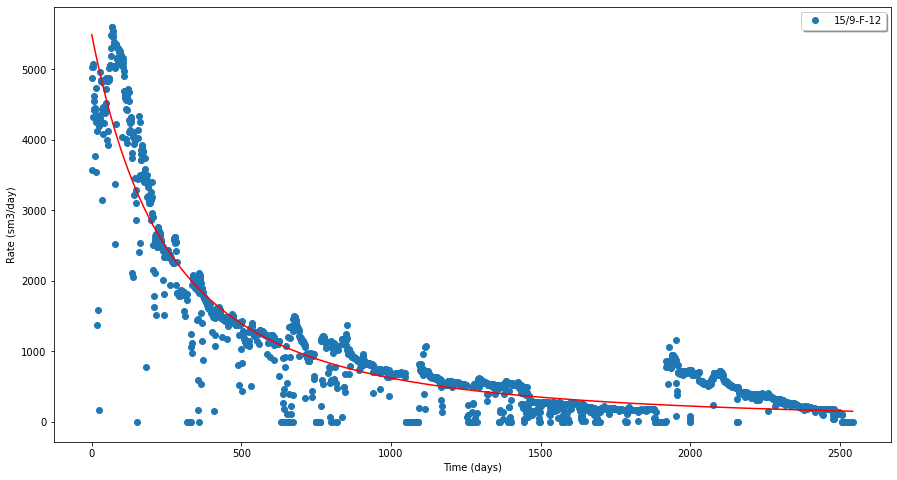

In [24]:
plt.figure(figsize =(15,5))
plot_data = wellplot2(dca_data,selected_wells)

#plots the arps model on the data
time = norm['days']
rate = arps(time,well_fit['beta'], well_fit['initial rate'],well_fit['decline rate'])
plt.plot(time,rate,'r')

## Drive mechanism of the field

In [27]:
print("The field has a hyperbolic constant of %0.3f, indicating that the field's recovery drive mechanism is water drive."%b)

The field has a hyperbolic constant of 0.501, indicating that the field's recovery drive mechanism is water drive.
